In [ ]:
import pickle
from google.colab import drive

import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup
import os

In [ ]:
# Google dirve에 연결

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# PATH
PATH_train='/content/drive/MyDrive/montage_project/train/'
PATH_train_montage = '/content/drive/MyDrive/montage_project/train/montage/'
PATH_train_json = '/content/drive/MyDrive/montage_project/train/H/'

PATH_train_resized='/content/drive/MyDrive/montage_project/train/resized/'

In [ ]:
PATH_test='/content/drive/MyDrive/montage_project/test/'
PATH_test_montage = '/content/drive/MyDrive/montage_project/test/montage/'
PATH_test_json = '/content/drive/MyDrive/montage_project/test/H/'


In [ ]:
# 라벨 설정
class_names_age = ['20~35','25~50','50']
class_names_gender = ['M','F']
class_names_face = ['계란형','긴형','둥근형','마름모형','사각형','역삼각형']
class_names_hairstyle = ['곱슬머리','스포츠형','웨이브형','직모(생머리)']
class_names_eyebrows =['각진형','둥근형','물결형','직선형','분류없음']

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

***train***

# ***1) json 파일 G드라이브 에 pickle저장 -> df_Data1 -> df_Data1.json.pickle***(pass)

In [ ]:
import os

train_json_list = os.listdir(PATH_train_json)

## Train의 json 파일 8071개 이름 list
filename_TJ = [file for file in train_json_list if file.endswith('.json')] 
print(len(filename_TJ))

import json

dict_json = []
for i,v in enumerate(filename_TJ):
  print(i,': ',v)
  a_json = open(PATH_train_json+v,"r")
  a_dict = json.load(a_json)
  dict_json.append(a_dict)

print(len(dict_json))

df_Data = pd.DataFrame(dict_json)
df_Data.to_pickle(PATH_train+'df_train_json.pickle')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
3072 :  5236.json
3073 :  8054.json
3074 :  4098.json
3075 :  5373.json
3076 :  2009.json
3077 :  9645.json
3078 :  4077.json
3079 :  4427.json
3080 :  3248.json
3081 :  8957.json
3082 :  1275.json
3083 :  610.json
3084 :  11766.json
3085 :  12849.json
3086 :  240.json
3087 :  9215.json
3088 :  1625.json
3089 :  12799.json
3090 :  2320.json
3091 :  7122.json
3092 :  3862.json
3093 :  7088.json
3094 :  7572.json
3095 :  6733.json
3096 :  169.json
3097 :  539.json
3098 :  31.json
3099 :  7821.json
3100 :  9096.json
3101 :  186.json
3102 :  6699.json
3103 :  3161.json
3104 :  6676.json
3105 :  1449.json
3106 :  5959.json
3107 :  9079.json
3108 :  11674.json
3109 :  1672.json
3110 :  1367.json
3111 :  647.json
3112 :  9612.json
3113 :  4889.json
3114 :  8900.json
3115 :  4020.json
3116 :  1388.json
3117 :  217.json
3118 :  9242.json
3119 :  1222.json
3120 :  5261.json
3121 :  4309.json
3122 :  4923.json
3123 :  6764.json
3124 :  9491.json
3125 :  4759.js

# ***2) json pickle 가져오기 df_Data1 -> dic_Data1***

In [ ]:
df_train = pd.read_pickle(PATH_train+'df_train_json.pickle')

In [ ]:
df_train.head()

,info,descripton,sketch_info,org_sketch_info
0,"[{'org_id': 545, 'org_img_name': '545', 'org_p...","[{'org_id': 545, 'face': {'type': '계란형', 'size...","[{'org_id': 545, 'sketch_id': 1916, 'img_name'...","[{'org_id': 545, 'org_sketch_id': 30050, 'img_..."
1,"[{'org_id': 1120, 'org_img_name': '1120', 'org...","[{'org_id': 1120, 'face': {'type': '둥근형', 'siz...","[{'org_id': 1120, 'sketch_id': 2684, 'img_name...","[{'org_id': 1120, 'org_sketch_id': 31068, 'img..."
2,"[{'org_id': 5163, 'org_img_name': '5163', 'org...","[{'org_id': 5163, 'face': {'type': '둥근형', 'siz...","[{'org_id': 5163, 'sketch_id': 30635, 'img_nam...","[{'org_id': 5163, 'org_sketch_id': 34857, 'img..."
3,"[{'org_id': 4322, 'org_img_name': '4322', 'org...","[{'org_id': 4322, 'face': {'type': '사각형', 'siz...","[{'org_id': 4322, 'sketch_id': 31574, 'img_nam...","[{'org_id': 4322, 'org_sketch_id': 34268, 'img..."
4,"[{'org_id': 816, 'org_img_name': '816', 'org_p...","[{'org_id': 816, 'face': {'type': '사각형', 'size...","[{'org_id': 816, 'sketch_id': 3563, 'img_name'...","[{'org_id': 816, 'org_sketch_id': 30677, 'img_..."


In [ ]:
len(df_train)

8071

In [ ]:
dic_train={
    # 고유 아이디
    'org_id':[],
    # 나이
    'age':[],
    # 성별
    'gender':[],
    # 얼굴유형
    'face':[],
    #얼굴크기
    #이마유형
    #머리스타일유형
    'hairstyle':[],
    #앞머리길이
    #옆머리길이
    #눈썹유형
    'eyebrows':[]
    #눈썹짙음
    #눈크기
    #눈유형
    #코크기
    #코길이
    #입유형
    #입크기
    #수염
    #구렛나룻
}

for i in range(len(df_train['info'])):
  dic_train['org_id'].append(str(df_train['info'][i][0]['org_id']))
  dic_train['age'].append(str(df_train['info'][i][0]['age']))
  dic_train['gender'].append(df_train['info'][i][0]['gender'])
  dic_train['face'].append(df_train['descripton'][i][0]['face']['type'])
  dic_train['hairstyle'].append(df_train['descripton'][i][0]['hairstyle']['type'])
  dic_train['eyebrows'].append(df_train['descripton'][i][0]['eyebrows']['type'])


print(len(dic_train),len(dic_train['org_id']))


6 8071


# ***3) 사진 파일명 가져오기***

In [ ]:
import os
train_montage_list = os.listdir(PATH_train_montage)

## Train의 Montage 파일 8071개 이름 list
filename_TM = [file for file in train_montage_list if file.endswith('.png')] 
len(filename_TM)

8071

# 4) 사진 이미지 폴더에서 G드라이브로 pickle 저장 하기(pass) 전처리 과정 포함!!

**<전처리>**
- resize 224*224

In [ ]:
import cv2 # 이미지를 읽어들일때 사용(저장할때 사용)

dic_pic = {}
for i,v in enumerate(filename_TM):
    list_pic=[]
    # 이미지 불러오기!
    img = cv2.imread(PATH_train_montage+filename_TM[i],cv2.IMREAD_COLOR)
    # 이미지 resize!
    # 이미지의 x, y가 224이 넘을 경우 작게해주기
    percent = 1
    if(img.shape[1] > img.shape[0]) :       # 이미지의 가로가 세보다 크면 가로를 640으로 맞추고 세로를 비율에 맞춰서
          percent = 224/img.shape[1]
    else :
          percent = 224/img.shape[0]

    img = cv2.resize(img, dsize=(0, 0), fx=percent, fy=percent, interpolation=cv2.INTER_LINEAR)

    # padding 하는 구간
    # 이미지 범위 지정 ; 높이 너비
    y,x,h,w = (0,0,img.shape[0], img.shape[1])

    # 그림 주변에 검은색으로 칠하기
    w_x = (224-(w-x))/2  # w_x = (224 - 그림)을 뺀 나머지 영역 크기 [ 그림나머지/2 [그림] 그림나머지/2 ]
    h_y = (224-(h-y))/2

    # 크기가 -면 0으로 지정.
    if(w_x < 0):  w_x = 0
    elif(h_y < 0):  h_y = 0

    M = np.float32([[1,0,w_x], [0,1,h_y]])  #(2*3 이차원 행렬)
    img_re = cv2.warpAffine(img, M, (224, 224)) #이동변환  
    dic_pic[v]=img_re


import pickle
import gzip

with gzip.open(PATH_train+'dic_train_img_re.pickle','wb') as f:
  pickle.dump(dic_pic,f)


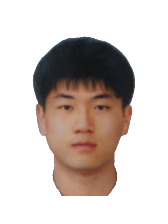

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(img)

In [ ]:
len(dic_pic)

8071

# ***5) train 사진 이미지 불러오기! -> dic_train_img***
- 224*224

In [ ]:
import pickle
import gzip
import pandas as pd

dic_train_img=[]

with gzip.open(PATH_train+'dic_train_img_re.pickle','rb') as f:
  dic_train_img=pickle.load(f)

len(dic_train_img)

8071

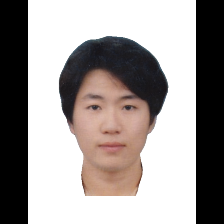

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(dic_train_img['20.png'])

# ***6) train Lable 만들기***

In [ ]:
train_img_list=[]
train_age_label=[]
train_gender_label=[]
train_face_label=[]
train_hairstyle_label=[]
train_eyebrows_label=[]


for i,v in enumerate(dic_train_img.keys()):
  # img list 만들기
  train_img_list.append(dic_train_img[v])
  # 이미지 title,org_id = v -> title_num
 # print(v)
  title_num = v.split('.')[0]
  # org_id 둘러보고 dic_train 값 제공
  for j,k in enumerate(dic_train['org_id']):
    if k == title_num:
#      print(j,k)
      # age label 만들기
      age= float(dic_train['age'][j])
      if 20 <= age <35 :  train_age_label.append(0)
      elif 35 <= i < 50 :  train_age_label.append(1)
      else: train_age_label.append(2)
      # gender label 만들기
      gender=dic_train['gender'][j]
      if(gender =='M'): train_gender_label.append(0)
      else: train_gender_label.append(1)
      # face label 만들기
      face = dic_train['face'][j]
      if(face =='계란형'):  train_face_label.append(0)
      elif(face =='긴형'):  train_face_label.append(1)
      elif(face =='둥근형'):  train_face_label.append(2)
      elif(face =='마름모형'):  train_face_label.append(3)
      elif(face =='사각형'):  train_face_label.append(4)
      else:  train_face_label.append(5)
      # hairstyle label 만들기  
      hairstyle= dic_train['hairstyle'][j]
      if(hairstyle =='곱슬머리'):  train_hairstyle_label.append(0)
      elif(hairstyle =='스포츠형'):  train_hairstyle_label.append(1)
      elif(hairstyle =='웨이브형'):  train_hairstyle_label.append(2)
      elif(hairstyle =='직모(생머리)'):  train_hairstyle_label.append(3)
      else:  train_hairstyle_label.append(4)
      # eyebrows label 만들기  
      eyebrows= dic_train['eyebrows'][j]
      if(eyebrows =='각진형'):  train_eyebrows_label.append(0)
      elif(eyebrows =='둥근형'):  train_eyebrows_label.append(1)
      elif(eyebrows =='물결형'):  train_eyebrows_label.append(2)
      elif(eyebrows =='직선형'):  train_eyebrows_label.append(3)
      else:  train_eyebrows_label.append(4)
  
import numpy as np
train_img_ar = np.array(train_img_list)
train_age_label = np.array(train_age_label)
train_gender_label = np.array(train_gender_label)
train_face_label = np.array(train_face_label)
train_hairstyle_label = np.array(train_hairstyle_label)  
train_eyebrows_label= np.array(train_eyebrows_label)  

In [ ]:
print(len(train_img_ar),len(train_age_label),len(train_gender_label),len(train_face_label),len(train_hairstyle_label),len(train_eyebrows_label))

8071 8071 8071 8071 8071 8071


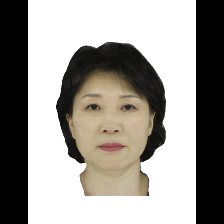

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(train_img_ar[1])

In [ ]:
# 라벨 설정
class_names_age = ['20~35','25~50','50']
class_names_gender = ['M','F']
class_names_face = ['계란형','긴형','둥근형','마름모형','사각형','역삼각형']
class_names_hairstyle = ['곱슬머리','스포츠형','웨이브형','직모(생머리)']
class_names_eyebrows =['각진형','둥근형','물결형','직선형','분류없음']

------------------------------------------------------------------------------------------------------------------------------------------------------------
# test

# 1) json 파일 가져오기 -> df_test -> df_test.json.pickle(pass)

In [ ]:
# 1) json 파일 가져오기 -> df_test -> df_test.json.pickle
import os

test_json_list = os.listdir(PATH_test_json)

## Test의 json 파일 1010개 이름 list
filename_TestJ = [file for file in test_json_list if file.endswith('.json')] 
print(len(filename_TestJ))

import json

dic_json = []
for i,v in enumerate(filename_TestJ):
  a_json = open(PATH_test_json+v,"r")
  a_dict = json.load(a_json)
  dic_json.append(a_dict)

print(len(dic_json))

df_test = pd.DataFrame(dic_json)
df_test.to_pickle(PATH_test+'df_test_json.pickle')


1010
1010



# 2) json pickle 가져오기 df_test -> dic_test


In [ ]:
# 2) json pickle 가져오기 df_test -> dic_test

PATH_test='/content/drive/MyDrive/montage_project/test/'
PATH_test_montage = '/content/drive/MyDrive/montage_project/test/montage/'
PATH_test_json = '/content/drive/MyDrive/montage_project/test/H/'

df_test = pd.read_pickle(PATH_test+'df_test_json.pickle')
df_test.head()
len(df_test)

dic_test={
    # 고유 아이디
    'org_id':[],
    # 나이
    'age':[],
    # 성별
    'gender':[],
    # 얼굴유형
    'face':[],
    #얼굴크기
    #이마유형
    #머리스타일유형
    'hairstyle':[],
    #앞머리길이
    #옆머리길이
    #눈썹유형
    'eyebrows':[]

    #눈썹짙음
    #눈크기
    #눈유형
    #코크기
    #코길이
    #입유형
    #입크기
    #수염
    #구렛나룻
}

for i in range(len(df_test['info'])):
  dic_test['org_id'].append(str(df_test['info'][i][0]['org_id']))
  dic_test['age'].append(str(df_test['info'][i][0]['age']))
  dic_test['gender'].append(df_test['info'][i][0]['gender'])
  dic_test['face'].append(df_test['descripton'][i][0]['face']['type'])
  dic_test['hairstyle'].append(df_test['descripton'][i][0]['hairstyle']['type'])
  dic_test['eyebrows'].append(df_test['descripton'][i][0]['eyebrows']['type'])


print(len(dic_test),len(dic_test['org_id']))

6 1010


# 3) 사진 파일 명 가져오기

In [ ]:
import os
test_montage_list = os.listdir(PATH_test_montage)

## Train의 Montage 파일 8071개 이름 list
filename_TestM = [file for file in test_montage_list if file.endswith('.png') or file.endswith('jpg')] 
len(filename_TestM)

1010

# 4) test 0-1010 사진 pickle 저장(pass)


In [ ]:
import cv2 # 이미지를 읽어들일때 사용(저장할때 사용)

dic_pic = {}
for i,v in enumerate(filename_TestM):
    list_pic=[]
    # 이미지 불러오기!
    img = cv2.imread(PATH_test_montage+filename_TestM[i],cv2.IMREAD_COLOR)
    # 이미지 resize!
    # 이미지의 x, y가 224이 넘을 경우 작게해주기
    percent = 1
    if(img.shape[1] > img.shape[0]) :       # 이미지의 가로가 세보다 크면 가로를 640으로 맞추고 세로를 비율에 맞춰서
          percent = 224/img.shape[1]
    else :
          percent = 224/img.shape[0]

    img = cv2.resize(img, dsize=(0, 0), fx=percent, fy=percent, interpolation=cv2.INTER_LINEAR)

    # padding 하는 구간
    # 이미지 범위 지정 ; 높이 너비
    y,x,h,w = (0,0,img.shape[0], img.shape[1])

    # 그림 주변에 검은색으로 칠하기
    w_x = (224-(w-x))/2  # w_x = (224 - 그림)을 뺀 나머지 영역 크기 [ 그림나머지/2 [그림] 그림나머지/2 ]
    h_y = (224-(h-y))/2

    # 크기가 -면 0으로 지정.
    if(w_x < 0):  w_x = 0
    elif(h_y < 0):  h_y = 0

    M = np.float32([[1,0,w_x], [0,1,h_y]])  #(2*3 이차원 행렬)
    img_re = cv2.warpAffine(img, M, (224, 224)) #이동변환  
    dic_pic[v]=img_re


import pickle
import gzip

with gzip.open(PATH_test+'dic_test_img_re.pickle','wb') as f:
  pickle.dump(dic_pic,f)

len(dic_pic)

1010

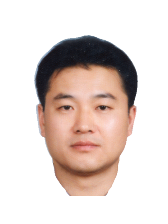

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(img)

# ***5) test 사진 pickle 불러오기!!***

In [ ]:
import pickle
import gzip
import pandas as pd

dic_img_test=[]

with gzip.open(PATH_test+'dic_test_img_re.pickle','rb') as f:
  dic_img_test=pickle.load(f)

len(dic_img_test)

1010

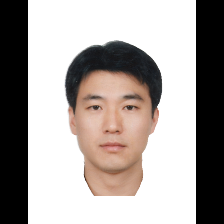

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(dic_img_test['3301.png'])

# **6) test LABEL 만들기**

In [ ]:
test_img_list=[]
test_age_label=[]
test_gender_label=[]
test_face_label=[]
test_hairstyle_label=[]
test_eyebrows_label=[]


for i,v in enumerate(dic_img_test.keys()):
  # img list 만들기
  test_img_list.append(dic_img_test[v])
  # 이미지 title,org_id = v -> title_num
  #print(v)
  title_num = v.split('.')[0]
  # org_id 둘러보고 dic_test 값 제공
  for j,k in enumerate(dic_test['org_id']):
    if k == title_num:
      #print(j,k)
      # age label 만들기
      age= float(dic_test['age'][j])
      if 20 <= age <35 :  test_age_label.append(0)
      elif 35 <= i < 50 :  test_age_label.append(1)
      else: test_age_label.append(2)
      # gender label 만들기
      gender=dic_test['gender'][j]
      if(gender =='M'): test_gender_label.append(0)
      else: test_gender_label.append(1)
      # face label 만들기
      face = dic_test['face'][j]
      if(face =='계란형'):  test_face_label.append(0)
      elif(face =='긴형'):  test_face_label.append(1)
      elif(face =='둥근형'):  test_face_label.append(2)
      elif(face =='마름모형'):  test_face_label.append(3)
      elif(face =='사각형'):  test_face_label.append(4)
      else:  test_face_label.append(5)
      # hairstyle label 만들기  
      hairstyle= dic_test['hairstyle'][j]
      if(hairstyle =='곱슬머리'):  test_hairstyle_label.append(0)
      elif(hairstyle =='스포츠형'):  test_hairstyle_label.append(1)
      elif(hairstyle =='웨이브형'):  test_hairstyle_label.append(2)
      elif(hairstyle =='직모(생머리)'):  test_hairstyle_label.append(3)
      else:  test_hairstyle_label.append(4)
      # eyebrows label 만들기  
      eyebrows= dic_test['eyebrows'][j]
      if(eyebrows =='각진형'):  test_eyebrows_label.append(0)
      elif(eyebrows =='둥근형'):  test_eyebrows_label.append(1)
      elif(eyebrows =='물결형'):  test_eyebrows_label.append(2)
      elif(eyebrows =='직선형'):  test_eyebrows_label.append(3)
      else:  test_eyebrows_label.append(4)

# array로 형변환

import numpy as np
test_img_ar = np.array(test_img_list)
test_age_label = np.array(test_age_label)
test_gender_label = np.array(test_gender_label)
test_face_label = np.array(test_face_label)
test_hairstyle_label = np.array(test_hairstyle_label)  
test_eyebrows_label= np.array(test_eyebrows_label)  

In [ ]:
print(len(test_img_ar),len(test_age_label),len(test_gender_label),len(test_face_label),len(test_hairstyle_label),len(test_eyebrows_label))

1010 1010 1010 1010 1010 1010


In [ ]:
print(test_img_ar.shape,test_age_label.shape,test_gender_label.shape,test_face_label.shape,test_hairstyle_label.shape,test_eyebrows_label.shape)

(1010, 224, 224, 3) (1010,) (1010,) (1010,) (1010,) (1010,)


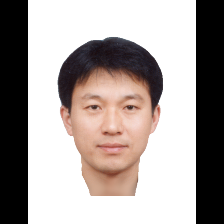

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(test_img_ar[0])

# 불러오기

In [ ]:
import gzip


## train 불러오기!
with gzip.open(PATH_train+'dic_train_label.pickle','rb') as f:
  dic_train_label = pickle.load(f)

print(len(dic_train_label),dic_train_label.keys())

6 dict_keys(['train_img_ar', 'train_age_label', 'train_gender_label', 'train_face_label', 'train_hairstyle_label', 'train_eyebrows_label'])


In [ ]:
dic_train_label['train_img_ar'][0].shape

(224, 224, 3)

In [ ]:
len(dic_train_label['train_img_ar']),len(dic_train_label['train_age_label']),len(dic_train_label['train_gender_label']),len(dic_train_label['train_hairstyle_label'])

(32089, 32089, 32089, 32089)

In [ ]:
import gzip


## test 불러오기!
with gzip.open(PATH_test+'dic_test_label.pickle','rb') as f:
  dic_test_label = pickle.load(f)

print(len(dic_test_label),dic_test_label.keys())

6 dict_keys(['test_img_ar', 'test_age_label', 'test_gender_label', 'test_face_label', 'test_hairstyle_label', 'test_eyebrows_label'])


In [ ]:
dic_test_label['test_img_ar'][0].shape

(224, 224, 3)

In [ ]:
len(dic_test_label['test_img_ar']),len(dic_test_label['test_age_label']),len(dic_test_label['test_gender_label']),len(dic_test_label['test_hairstyle_label'])

(1010, 1010, 1010, 1010)

## Tensorflow

In [ ]:
import tensorflow as tf

tf.__version__

'2.8.2'

텐서플로우 2.0 버전에서는 Keras가 기본 탑재가 되었고   
공식사이트에서도 Keras를 사용하기 때문에 저희도 Keras 위주로 진행을 하겠습니다.  
(keras 로 코딩을 하는게 훨씬 쉽습니다.)

In [ ]:
from tensorflow.keras import datasets, layers, models #Tensorflow에 있는 Keras 함수들 호출하기

# CNN - Age




In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models #Tensorflow에 있는 Keras 함수들 호출하기

In [ ]:
train_input = train_img_ar
test_input = test_img_ar

train_target = train_age_label
test_target =test_age_label

# 정규화
train_input, test_input = train_input / 255.0, test_input / 255.0

In [ ]:
train_input.shape,train_target.shape,test_input.shape,test_target.shape

((8071, 224, 224, 3), (8071,), (1010, 224, 224, 3), (1010,))

In [ ]:
set(train_age_label)

{0, 1, 2}

In [ ]:
#모델 구축
model = models.Sequential()
## filtering layer
# input = 180*135
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224,224,3)))   #64=필터의 개수, 3,3은 필터의 크기
model.add(layers.MaxPooling2D((2, 2)))  #필터의 개수 채널 입력할 필요없다!! 앞의 이미지 따라가니까, activation 없다->비선형 통과한게 아니니까
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))   #11*11 을 2*2패딩 적용하면 ? 5*5
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

## classification layer
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
# output = 3개!
model.add(layers.Dense(3, activation='softmax'))

#모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 flatten (Flatten)           (None, 692224)            0

In [ ]:
# 학습
model.fit(train_input, train_target, epochs=5,validation_split=0.2,verbose=1)

Epoch 1/5
202/202 [==============================] - 900s 4s/step - loss: 0.5954 - accuracy: 0.7988 - val_loss: 0.8264 - val_accuracy: 0.6217
Epoch 2/5
202/202 [==============================] - 897s 4s/step - loss: 0.2456 - accuracy: 0.8937 - val_loss: 0.5195 - val_accuracy: 0.7771
Epoch 3/5
202/202 [==============================] - 897s 4s/step - loss: 0.1913 - accuracy: 0.9167 - val_loss: 0.6000 - val_accuracy: 0.7009
Epoch 4/5
202/202 [==============================] - 895s 4s/step - loss: 0.1787 - accuracy: 0.9266 - val_loss: 0.4548 - val_accuracy: 0.8272
Epoch 5/5
202/202 [==============================] - 873s 4s/step - loss: 0.1516 - accuracy: 0.9370 - val_loss: 0.4433 - val_accuracy: 0.8248


In [ ]:
# 시험
test_loss, test_acc = model.evaluate(test_input, test_target, verbose=2)
print(test_acc)

32/32 - 35s - loss: 0.2939 - accuracy: 0.9178 - 35s/epoch - 1s/step
0.9178217649459839


# CNN-gender

In [ ]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models #Tensorflow에 있는 Keras 함수들 호출하기

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(train_img_ar,
                                                                      train_gender_label,
                                                                      shuffle=True, 
                                                                      stratify=train_age_label, 
                                                                      random_state=34)

# 정규화
train_input, test_input = train_input / 255.0, test_input / 255.0

In [ ]:
train_input.shape,train_target.shape,test_input.shape,test_target.shape

((6053, 180, 135, 3), (6053,), (2018, 180, 135, 3), (2018,))

In [ ]:
set(train_Data['gender'])

{'F', 'M'}

In [ ]:
set(train_gender_label)

{0, 1}

In [ ]:
#모델 구축
model = models.Sequential()
## filtering layer
# input = 180*135
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(180,135,3)))   #64=필터의 개수, 3,3은 필터의 크기
model.add(layers.MaxPooling2D((2, 2)))  #필터의 개수 채널 입력할 필요없다!! 앞의 이미지 따라가니까, activation 없다->비선형 통과한게 아니니까
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))   #11*11 을 2*2패딩 적용하면 ? 5*5
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

## classification layer
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
# output = 2개!
model.add(layers.Dense(2, activation='softmax'))

#모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 178, 133, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 66, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 87, 64, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 43, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 41, 30, 256)       295168    
                                                                 
 flatten_3 (Flatten)         (None, 314880)           

In [ ]:
# 학습
model.fit(train_input, train_target, epochs=5,validation_split=0.2,verbose=1)

Epoch 1/5
152/152 [==============================] - 244s 2s/step - loss: 0.3116 - accuracy: 0.9025 - val_loss: 0.1489 - val_accuracy: 0.9463
Epoch 2/5
152/152 [==============================] - 244s 2s/step - loss: 0.1188 - accuracy: 0.9566 - val_loss: 0.0987 - val_accuracy: 0.9661
Epoch 3/5
152/152 [==============================] - 245s 2s/step - loss: 0.0912 - accuracy: 0.9667 - val_loss: 0.0732 - val_accuracy: 0.9777
Epoch 4/5
152/152 [==============================] - 248s 2s/step - loss: 0.0676 - accuracy: 0.9715 - val_loss: 0.1079 - val_accuracy: 0.9744
Epoch 5/5
152/152 [==============================] - 249s 2s/step - loss: 0.0649 - accuracy: 0.9738 - val_loss: 0.0764 - val_accuracy: 0.9761


In [ ]:
# 시험
test_loss, test_acc = model.evaluate(test_input, test_target, verbose=2)
print(test_acc)

64/64 - 27s - loss: 0.0619 - accuracy: 0.9797 - 27s/epoch - 416ms/step
0.9796828627586365


# CNN-face

In [ ]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models #Tensorflow에 있는 Keras 함수들 호출하기

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(train_img_ar,
                                                                      train_face_label,
                                                                      shuffle=True, 
                                                                      stratify=train_face_label, 
                                                                      random_state=34)

# 정규화
train_input, test_input = train_input / 255.0, test_input / 255.0

In [ ]:
train_input.shape,train_target.shape,test_input.shape,test_target.shape

((6053, 180, 135, 3), (6053,), (2018, 180, 135, 3), (2018,))

In [ ]:
set(dic_Data['face'])

{'계란형', '긴형', '둥근형', '마름모형', '사각형', '역삼각형'}

In [ ]:
set(Data_face_label)

{0, 1, 2, 3, 4, 5}

In [ ]:
#모델 구축
model = models.Sequential()
## filtering layer
# input = 180*135
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(180,135,3)))   #64=필터의 개수, 3,3은 필터의 크기
model.add(layers.MaxPooling2D((2, 2)))  #필터의 개수 채널 입력할 필요없다!! 앞의 이미지 따라가니까, activation 없다->비선형 통과한게 아니니까
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))   #11*11 을 2*2패딩 적용하면 ? 5*5
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

## classification layer
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
# output
model.add(layers.Dense(6, activation='softmax'))

#모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 178, 133, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 66, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 87, 64, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 43, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 41, 30, 256)       295168    
                                                                 
 flatten_4 (Flatten)         (None, 314880)           

In [ ]:
# 학습
model.fit(train_input, train_target, epochs=5,validation_split=0.2,verbose=1)

Epoch 1/5
152/152 [==============================] - 248s 2s/step - loss: 1.4973 - accuracy: 0.3567 - val_loss: 1.3522 - val_accuracy: 0.4005
Epoch 2/5
152/152 [==============================] - 248s 2s/step - loss: 1.3270 - accuracy: 0.4329 - val_loss: 1.2764 - val_accuracy: 0.4814
Epoch 3/5
152/152 [==============================] - 252s 2s/step - loss: 1.2435 - accuracy: 0.4806 - val_loss: 1.2576 - val_accuracy: 0.4690
Epoch 4/5
152/152 [==============================] - 346s 2s/step - loss: 1.1892 - accuracy: 0.5103 - val_loss: 1.2311 - val_accuracy: 0.4889
Epoch 5/5
152/152 [==============================] - 242s 2s/step - loss: 1.1428 - accuracy: 0.5310 - val_loss: 1.2506 - val_accuracy: 0.4814


In [ ]:
# 시험
test_loss, test_acc = model.evaluate(test_input, test_target, verbose=2)
print(test_acc)

64/64 - 24s - loss: 1.2350 - accuracy: 0.4911 - 24s/epoch - 375ms/step
0.49108028411865234


# CNN-hairstyle

In [ ]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models #Tensorflow에 있는 Keras 함수들 호출하기

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(train_img_ar,
                                                                      train_hairstyle_label,
                                                                      shuffle=True, 
                                                                      stratify=train_hairstyle_label, 
                                                                      random_state=34)

# 정규화
train_input, test_input = train_input / 255.0, test_input / 255.0

In [ ]:
train_input.shape,train_target.shape,test_input.shape,test_target.shape

((6053, 180, 135, 3), (6053,), (2018, 180, 135, 3), (2018,))

In [ ]:
set(dic_Data['hairstyle'])

{'곱슬머리', '스포츠형', '웨이브형', '직모(생머리)', '탈모형'}

In [ ]:
set(Data_hairstyle_label)

{0, 1, 2, 3, 4}

In [ ]:
#모델 구축
model = models.Sequential()
## filtering layer
# input = 180*135
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(180,135,3)))   #64=필터의 개수, 3,3은 필터의 크기
model.add(layers.MaxPooling2D((2, 2)))  #필터의 개수 채널 입력할 필요없다!! 앞의 이미지 따라가니까, activation 없다->비선형 통과한게 아니니까
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))   #11*11 을 2*2패딩 적용하면 ? 5*5
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

## classification layer
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
# output
model.add(layers.Dense(5, activation='softmax'))

#모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 178, 133, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 89, 66, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 87, 64, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 43, 32, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 41, 30, 256)       295168    
                                                                 
 flatten_5 (Flatten)         (None, 314880)           

In [ ]:
# 학습
model.fit(train_input, train_target, epochs=5,validation_split=0.2,verbose=1)

Epoch 1/5
152/152 [==============================] - 236s 2s/step - loss: 1.0869 - accuracy: 0.5549 - val_loss: 0.9256 - val_accuracy: 0.5714
Epoch 2/5
152/152 [==============================] - 236s 2s/step - loss: 0.8783 - accuracy: 0.6010 - val_loss: 0.8647 - val_accuracy: 0.6350
Epoch 3/5
152/152 [==============================] - 249s 2s/step - loss: 0.8283 - accuracy: 0.6262 - val_loss: 0.8400 - val_accuracy: 0.6309
Epoch 4/5
152/152 [==============================] - 237s 2s/step - loss: 0.7921 - accuracy: 0.6499 - val_loss: 0.8358 - val_accuracy: 0.6416
Epoch 5/5
152/152 [==============================] - 235s 2s/step - loss: 0.7551 - accuracy: 0.6656 - val_loss: 0.7965 - val_accuracy: 0.6466


In [ ]:
# 시험
test_loss, test_acc = model.evaluate(test_input, test_target, verbose=2)
print(test_acc)

64/64 - 24s - loss: 1.2350 - accuracy: 0.4911 - 24s/epoch - 375ms/step
0.49108028411865234


# RESNET50 -Age


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models #Tensorflow에 있는 Keras 함수들 호출하기

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
train_input = train_img_ar
test_input = test_img_ar

train_target = train_age_label
test_target =test_age_label


from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input,
                                                                      train_target,
                                                                      shuffle=True, 
                                                                      stratify=train_target, 
                                                                      random_state=34)




In [ ]:
train_input = train_input.astype('float32')
val_input=val_input.astype('float32')
test_input=test_input.astype('float32')

In [ ]:
def zero_mean(image):
    # zero-centering
    return np.mean(image, axis=0)

In [ ]:
zero_mean_img = zero_mean(train_input)

In [ ]:
train_input -= zero_mean_img
val_input -= zero_mean_img
test_input -= zero_mean_img

In [ ]:
train_input.shape,train_target.shape,val_input.shape,val_target.shape

((6053, 224, 224, 3), (6053,), (2018, 224, 224, 3), (2018,))

In [ ]:
test_input.shape,test_target.shape

((1010, 224, 224, 3), (1010,))

In [ ]:
set(train_age_label)

{0, 1, 2}

In [ ]:
## 일부 재학습 모델
base_model = ResNet50(include_top=False, input_shape = (224, 224,3), weights = 'imagenet')

for layer in base_model.layers[:-10]: 
    layer.trainable = False			

inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 49,278,851
Trainable params: 30,156,803
Non-tra

In [ ]:
# 학습
model.fit(train_input, train_target, epochs = 5, batch_size= 125, validation_data=(val_input, val_target))

Epoch 1/5
49/49 [==============================] - 742s 15s/step - loss: 1.0215 - accuracy: 0.7780 - val_loss: 0.2923 - val_accuracy: 0.8860
Epoch 2/5
49/49 [==============================] - 754s 15s/step - loss: 0.2488 - accuracy: 0.9000 - val_loss: 0.2434 - val_accuracy: 0.8944
Epoch 3/5
49/49 [==============================] - 810s 17s/step - loss: 0.1956 - accuracy: 0.9197 - val_loss: 0.2307 - val_accuracy: 0.9024
Epoch 4/5
49/49 [==============================] - 780s 16s/step - loss: 0.1613 - accuracy: 0.9338 - val_loss: 0.2540 - val_accuracy: 0.8940
Epoch 5/5
49/49 [==============================] - 794s 16s/step - loss: 0.1298 - accuracy: 0.9456 - val_loss: 0.2379 - val_accuracy: 0.8999


In [ ]:
# 시험
model.evaluate(test_input, test_target)

32/32 [==============================] - 89s 3s/step - loss: 0.4365 - accuracy: 0.9069


[0.43645957112312317, 0.906930685043335]

# RESNET50 - gender


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models #Tensorflow에 있는 Keras 함수들 호출하기

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
type(dic_train_label['train_img_ar']),type(dic_test_label['test_img_ar'])

(numpy.ndarray, numpy.ndarray)

In [ ]:
len(dic_train_label['train_img_ar']),len(dic_test_label['test_img_ar'])

(32089, 1010)

In [ ]:
dic_train_label['train_img_ar'][0].shape,dic_test_label['test_img_ar'][0].shape

((224, 224, 3), (224, 224, 3))

In [ ]:
type(dic_train_label['train_age_label']),type(dic_test_label['test_age_label'])

(numpy.ndarray, numpy.ndarray)

In [ ]:
len(dic_train_label['train_age_label']),len(dic_test_label['test_age_label'])

(32089, 1010)

In [ ]:
dic_train_label['train_age_label'][10000],dic_test_label['test_age_label'][1000]

(0, 2)

In [ ]:
train_input = dic_train_label['train_img_ar']
test_input = dic_test_label['test_img_ar']

train_target = dic_train_label['train_gender_label']
test_target =dic_test_label['test_gender_label']


from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input,
                                                                      train_target,
                                                                      shuffle=True, 
                                                                      stratify=train_target, 
                                                                      random_state=34)

In [ ]:
train_input = train_input.astype('float32')
val_input=val_input.astype('float32')
test_input=test_input.astype('float32')

In [ ]:
def zero_mean(image):
    # zero-centering
    return np.mean(image, axis=0)

In [ ]:
zero_mean_img = zero_mean(train_input)
zero_mean_img.shape

(224, 224, 3)

In [ ]:
train_input -= zero_mean_img
val_input -= zero_mean_img
test_input -= zero_mean_img

UFuncTypeError: ignored

In [ ]:
train_input.shape,train_target.shape,val_input.shape,val_target.shape

((24066, 224, 224, 3), (24066,), (8023, 224, 224, 3), (8023,))

In [ ]:
test_input.shape,test_target.shape

((1010, 224, 224, 3), (1010,))

In [ ]:
set(train_target)

{0, 1}

In [ ]:
## 일부 재학습 모델
base_model = ResNet50(include_top=False, input_shape = (224, 224,3), weights = 'imagenet')

for layer in base_model.layers[:-10]: 
    layer.trainable = False			

inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(2, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 49,278,594
Trainable params: 30,156,546
Non-tra

In [ ]:
# 학습
model.fit(train_input, train_target, epochs = 5, batch_size= 125, validation_data=(val_input, val_target))

## fine-tune
base_model.trainable = True

model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

model.fit(train_input, train_target, epochs = 5, validation_data=(val_input, val_target), 
                   batch_size= 125)

# 시험
model.evaluate(test_input, test_target)

Epoch 1/5
193/193 [==============================] - 2834s 15s/step - loss: 0.4224 - accuracy: 0.8795 - val_loss: 0.1330 - val_accuracy: 0.9511
Epoch 2/5
193/193 [==============================] - 2839s 15s/step - loss: 0.1245 - accuracy: 0.9525 - val_loss: 0.1116 - val_accuracy: 0.9576
Epoch 3/5
193/193 [==============================] - 2838s 15s/step - loss: 0.0995 - accuracy: 0.9628 - val_loss: 0.1034 - val_accuracy: 0.9619
Epoch 4/5
193/193 [==============================] - 2850s 15s/step - loss: 0.0765 - accuracy: 0.9708 - val_loss: 0.1060 - val_accuracy: 0.9612
Epoch 5/5
181/193 [===========================>..] - ETA: 2:17 - loss: 0.0563 - accuracy: 0.9781

In [ ]:
## fine-tune
base_model.trainable = True

model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

model.fit(train_input, train_target, epochs = 5, validation_data=(val_input, val_target), 
                   batch_size= 125)

In [ ]:
# 시험
model.evaluate(test_input, test_target)

32/32 [==============================] - 89s 3s/step - loss: 0.4365 - accuracy: 0.9069


[0.43645957112312317, 0.906930685043335]

# RESNET50 - hairstyle


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models #Tensorflow에 있는 Keras 함수들 호출하기

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
type(dic_train_label['train_img_ar']),type(dic_test_label['test_img_ar'])

(numpy.ndarray, numpy.ndarray)

In [ ]:
len(dic_train_label['train_img_ar']),len(dic_test_label['test_img_ar'])

(32089, 1010)

In [ ]:
dic_train_label['train_img_ar'][0].shape,dic_test_label['test_img_ar'][0].shape

((224, 224, 3), (224, 224, 3))

In [ ]:
type(dic_train_label['train_hairstyle_label']),type(dic_test_label['test_hairstyle_label'])

(numpy.ndarray, numpy.ndarray)

In [ ]:
len(dic_train_label['train_hairstyle_label']),len(dic_test_label['test_hairstyle_label'])

(32089, 1010)

In [ ]:
dic_train_label['train_hairstyle_label'][10000],dic_test_label['test_hairstyle_label'][1000]

(0, 3)

In [ ]:
set(dic_train_label['train_hairstyle_label'])

{0, 1, 2, 3, 4}

In [ ]:
train_input = dic_train_label['train_img_ar']
test_input = dic_test_label['test_img_ar']

train_target = dic_train_label['train_hairstyle_label']
test_target =dic_test_label['test_hairstyle_label']


from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input,
                                                                      train_target,
                                                                      shuffle=True, 
                                                                      stratify=train_target, 
                                                                      random_state=34)

In [ ]:
train_input = train_input.astype('float32')
val_input=val_input.astype('float32')
test_input=test_input.astype('float32')

In [ ]:
def zero_mean(image):
    # zero-centering
    return np.mean(image, axis=0)

In [ ]:
zero_mean_img = zero_mean(train_input)
zero_mean_img.shape

(224, 224, 3)

In [ ]:
train_input -= zero_mean_img
val_input -= zero_mean_img
test_input -= zero_mean_img

In [ ]:
train_input.shape,train_target.shape,val_input.shape,val_target.shape

((24066, 224, 224, 3), (24066,), (8023, 224, 224, 3), (8023,))

In [ ]:
test_input.shape,test_target.shape

((1010, 224, 224, 3), (1010,))

In [ ]:
set(train_target)

{0, 1, 2, 3, 4}

In [ ]:
## 일부 재학습 모델
base_model = ResNet50(include_top=False, input_shape = (224, 224,3), weights = 'imagenet')

for layer in base_model.layers[:-10]: 
    layer.trainable = False			

inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 49,279,365
Trainable params: 30,157,317
Non-tra

In [ ]:
# 학습
# 전처리 + 헤어스타일 라벨 5개 + 증강(32089개) + zero-mean x

model.fit(train_input, train_target, epochs = 5, batch_size= 125, validation_data=(val_input, val_target))

Epoch 1/5
193/193 [==============================] - 2227s 12s/step - loss: 1.1149 - accuracy: 0.5779 - val_loss: 0.8100 - val_accuracy: 0.6591
Epoch 2/5
193/193 [==============================] - 2232s 12s/step - loss: 0.7998 - accuracy: 0.6627 - val_loss: 0.7970 - val_accuracy: 0.6554
Epoch 3/5
193/193 [==============================] - 2211s 11s/step - loss: 0.7267 - accuracy: 0.6894 - val_loss: 0.7475 - val_accuracy: 0.6803
Epoch 4/5
193/193 [==============================] - 2219s 12s/step - loss: 0.6556 - accuracy: 0.7207 - val_loss: 0.7526 - val_accuracy: 0.6812
Epoch 5/5
193/193 [==============================] - 2216s 11s/step - loss: 0.5864 - accuracy: 0.7474 - val_loss: 0.7691 - val_accuracy: 0.6739


In [ ]:
## fine-tune
base_model.trainable = True

model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.fit(train_input, train_target, epochs = 5, batch_size= 125, validation_data=(val_input, val_target))

Epoch 1/5
193/193 [==============================] - 7030s 36s/step - loss: 1.2901 - accuracy: 0.5756 - val_loss: 0.8017 - val_accuracy: 0.6420
Epoch 2/5
193/193 [==============================] - 7109s 37s/step - loss: 0.7881 - accuracy: 0.6611 - val_loss: 0.7980 - val_accuracy: 0.6491
Epoch 3/5
193/193 [==============================] - 7126s 37s/step - loss: 0.6945 - accuracy: 0.7041 - val_loss: 0.7565 - val_accuracy: 0.6779
Epoch 4/5
193/193 [==============================] - 7103s 37s/step - loss: 0.6182 - accuracy: 0.7347 - val_loss: 0.7329 - val_accuracy: 0.6874
Epoch 5/5
193/193 [==============================] - 7134s 37s/step - loss: 0.5370 - accuracy: 0.7700 - val_loss: 0.7721 - val_accuracy: 0.6768


In [ ]:
# 시험
model.evaluate(test_input, test_target)

32/32 [==============================] - 62s 2s/step - loss: 0.7411 - accuracy: 0.6624


[0.7410979866981506, 0.6623762249946594]